<a href="https://colab.research.google.com/github/pavankalyano76/PavanKalyan_INFO5731_Spring2025/blob/main/NatukulaPavanKalyanAssignment04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment: 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) and BERTopic.**



**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100


NOTE: The output should be presented well to get **full points**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

**Dataset**: 20 Newsgroups dataset

**Dataset Link**: https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

**Consider Random 2000 rows only**

Generate K=10 topics by using LDA and LSA,
then calculate coherence score and determine the optimized K value by the coherence score. Further, summarize and visualize each topics in you own words.


In [1]:
!pip install gensim
!pip uninstall -y numpy
!pip install numpy==1.24.4 --force-reinstall --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 435.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 6.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 76.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This beh

In [1]:
from sklearn.datasets import fetch_20newsgroups
import random
import pandas as pd

# Load full dataset
data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Sample 2000 random posts
random.seed(42)
indices = random.sample(range(len(data.data)), 2000)
sampled_data = [data.data[i] for i in indices]
df = pd.DataFrame(sampled_data, columns=["text"])


In [2]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import re

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = re.sub(r'\W+', ' ', text.lower())
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 3]
    return " ".join(tokens)

df['cleaned'] = df['text'].apply(preprocess)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [3]:
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
import gensim
import numpy as np

# Tokenized docs
tokenized_docs = [doc.split() for doc in df['cleaned']]

# Create Dictionary and Corpus
dictionary = Dictionary(tokenized_docs)
corpus = [dictionary.doc2bow(text) for text in tokenized_docs]

# Create TF and TF-IDF matrices
vectorizer = CountVectorizer(max_df=0.95, min_df=2)
tf = vectorizer.fit_transform(df['cleaned'])

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)
tfidf = tfidf_vectorizer.fit_transform(df['cleaned'])

# LDA
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda_topics = lda.fit_transform(tf)

# LSA
lsa = TruncatedSVD(n_components=10, random_state=42)
lsa_topics = lsa.fit_transform(tfidf)


In [7]:
def compute_coherence_values(model_type, texts, dictionary, corpus, start=2, limit=10, step=1):
    coherence_scores = []
    for k in range(start, limit, step):
        if model_type == 'lda':
            model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, random_state=42, passes=5)
        elif model_type == 'lsa':
            model = gensim.models.LsiModel(corpus=corpus, id2word=dictionary, num_topics=k)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_scores.append((k, coherencemodel.get_coherence()))
    return coherence_scores

lda_coherence = compute_coherence_values('lda', tokenized_docs, dictionary, corpus)
lsa_coherence = compute_coherence_values('lsa', tokenized_docs, dictionary, corpus)


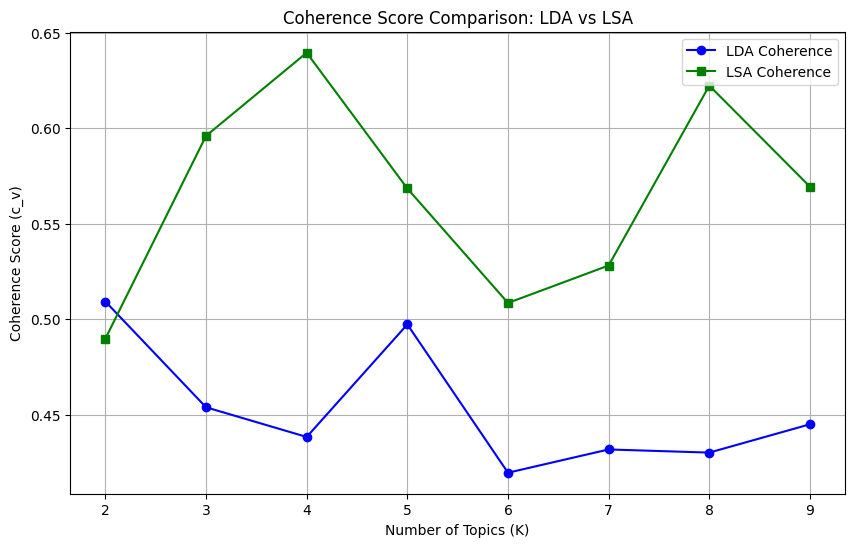

In [8]:
import matplotlib.pyplot as plt

# Unpack the scores
lda_k, lda_scores = zip(*lda_coherence)
lsa_k, lsa_scores = zip(*lsa_coherence)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(lda_k, lda_scores, marker='o', label='LDA Coherence', color='blue')
plt.plot(lsa_k, lsa_scores, marker='s', label='LSA Coherence', color='green')
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence Score (c_v)")
plt.title("Coherence Score Comparison: LDA vs LSA")
plt.legend()
plt.grid(True)
plt.show()



In [9]:
from gensim.models import LsiModel
# Build the LSA model
best_lsa_model = LsiModel(corpus=corpus, id2word=dictionary, num_topics=4)

# Print topics
topics = best_lsa_model.print_topics(num_topics=5, num_words=10)
for idx, topic in enumerate(topics):
    print(f"Topic {idx+1}: {topic}")

Topic 1: (0, '-0.226*"president" + -0.219*"stephanopoulos" + -0.195*"program" + -0.180*"think" + -0.174*"file" + -0.165*"package" + -0.163*"would" + -0.160*"entry" + -0.157*"know" + -0.154*"also"')
Topic 2: (1, '-0.312*"stephanopoulos" + 0.274*"entry" + -0.261*"president" + 0.257*"file" + -0.184*"think" + 0.155*"available" + 0.147*"data" + -0.145*"know" + -0.143*"said" + 0.132*"image"')
Topic 3: (2, '0.646*"entry" + -0.189*"data" + -0.175*"available" + -0.164*"image" + 0.155*"section" + 0.153*"rule" + 0.135*"program" + -0.111*"package" + 0.108*"build" + 0.105*"remark"')
Topic 4: (3, '0.438*"stephanopoulos" + -0.264*"administration" + -0.242*"russian" + -0.240*"russia" + -0.226*"senior" + -0.215*"official" + -0.201*"government" + -0.169*"program" + -0.162*"fund" + 0.155*"said"')


# **BERTopic**

The following question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents.

Dataset from **assignment-3** (text dataset) .

> Dont use any custom datasets.


> Dataset must have 1000+ rows, no duplicates and null values



# **Question 2 (20 Points)**



Q2) **Generate K=10 topics by using BERTopic and then find optimal K value by the coherence score. Interpret each topic and visualize with suitable style.**

In [4]:
!pip install 'numpy>=1.24'
#!pip install --upgrade jax bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 21.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.


In [7]:
!pip install --upgrade numpy --quiet
!pip uninstall -y bertopic
!pip install bertopic[all] --quiet


Found existing installation: bertopic 0.17.0
Uninstalling bertopic-0.17.0:
  Successfully uninstalled bertopic-0.17.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 32.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.0.2 which is incompatible.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bertopic import BERTopic
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary


k = 10
df = pd.read_csv('/content/Narrators_Information_Cleaned.csv', usecols=['CleanedDetails'])
details = df.CleanedDetails.to_list()
df.head()

,CleanedDetails
0,nisei femal born may selleck washington spent ...
1,nisei male born june seattl washington grew ar...
2,nisei femal born octob seattl washington famil...
3,nisei femal born juli boyl height california a...
4,sansei male born march torranc california grew...


In [5]:
Berttopic_model = BERTopic(nr_topics=k)

In [7]:
topics, probabilities = Berttopic_model.fit_transform(details)

In [8]:
Berttopic_model.get_topic_info()


,Topic,Count,Name,Representation,Representative_Docs
0,0,12,0_redress_movement_os_justic,"[redress, movement, os, justic, identifi, admi...",[born honolulu hawaii dure redress movement de...
1,1,26,1_interview_bill_tashima_led,"[interview, bill, tashima, led, jacl, panel, i...",[in interview brent seto led panel tatsuo naka...
2,2,861,2_born_nisei_california_male,"[born, nisei, california, male, grew, femal, w...",[nisei male born may portland oregon grew port...


In [9]:
Berttopic_model.visualize_barchart(top_n_topics=10, n_words = 40, width = 300, height = 300)

In [11]:
Berttopic_model.visualize_hierarchy(top_n_topics=10, width = 700, height = 700)

In [12]:
pip install gensim


In [13]:
pip install --upgrade h5py

In [14]:
!pip install --upgrade jax jaxlib

In [17]:
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary

def calculate_coherence_score(docs, min_topics=2, max_topics=10):
    coherence_scores = []

    for num_topics in range(min_topics, max_topics + 1):

        topic_model = BERTopic(nr_topics=num_topics)
        topics, _ = topic_model.fit_transform(docs)

        topic_keywords = [
            [word for word, _ in topic_model.get_topic(topic)]
            for topic in topic_model.get_topics().keys()
            if topic != -1
        ]

        tokenized_docs = [doc.split() for doc in docs]
        dictionary = Dictionary(tokenized_docs)

        coherence_model = CoherenceModel(
            topics=topic_keywords,
            dictionary=dictionary,
            texts=tokenized_docs,
            coherence='c_v'
        )
        score = coherence_model.get_coherence()
        coherence_scores.append((num_topics, score))

        print(f"Topics={num_topics}, Coherence Score={score:.4f}")

    return coherence_scores

coherence_scores = calculate_coherence_score(details, min_topics=2, max_topics=20)


Topics=2, Coherence Score=0.7109
Topics=3, Coherence Score=0.6907
Topics=4, Coherence Score=0.8084
Topics=5, Coherence Score=0.6740
Topics=6, Coherence Score=0.7934
Topics=7, Coherence Score=0.6324
Topics=8, Coherence Score=0.6525
Topics=9, Coherence Score=0.6298
Topics=10, Coherence Score=0.6108
Topics=11, Coherence Score=0.6078
Topics=12, Coherence Score=0.5842
Topics=13, Coherence Score=0.7934
Topics=14, Coherence Score=0.6032
Topics=15, Coherence Score=0.7934
Topics=16, Coherence Score=0.8069
Topics=17, Coherence Score=0.8084
Topics=18, Coherence Score=0.6393
Topics=19, Coherence Score=0.8084
Topics=20, Coherence Score=0.8069


In [19]:

best_topic_count = 10
final_model = BERTopic(nr_topics=best_topic_count)
final_topics, final_probs = final_model.fit_transform(details)


In [20]:
def evaluate_coherence(documents, min_topics=2, max_topics=20):
    scores = []
    for num_topics in range(min_topics, max_topics + 1):
        topic_model = BERTopic(nr_topics=num_topics)
        _, _ = topic_model.fit_transform(documents)

        topic_terms = [list(dict(topic_model.get_topic(i)).keys()) for i in range(num_topics)]

        # Create dictionary and corpus for coherence calculation
        dictionary = Dictionary([terms for terms in topic_terms])
        corpus = [dictionary.doc2bow(terms) for terms in topic_terms]

        # Calculate coherence score using the c_v metric
        coherence_model = CoherenceModel(
            topics=topic_terms,
            texts=[doc.split() for doc in documents],
            dictionary=dictionary,
            coherence='c_v'
        )
        scores.append((num_topics, coherence_model.get_coherence()))

    return scores


In [25]:
model = BERTopic(nr_topics=best_topic_count)
topic_results, topic_probabilities = model.fit_transform(details)

# Interpret the topics by examining their top words
print("\nTopic Interpretation (Top Words):")
for topic_num in range(best_topic_count):
    print(f"Topic {topic_num}:")
    print(model.get_topic(topic_num))
    print("\n")

# Visualize the topics
model.visualize_topics()
model.visualize_barchart(top_n_topics=12, n_words=10, width=350, height=350)
model.visualize_hierarchy(top_n_topics=12, width=700, height=700)


Topic Interpretation (Top Words):
Topic 0:
[('nisei', 0.06312162631700156), ('born', 0.061102051671154414), ('washington', 0.052859621155862346), ('grew', 0.05198081470411813), ('femal', 0.04565592469160669), ('male', 0.04522876290721514), ('seattl', 0.04400131583727543), ('parent', 0.03803918782732871), ('oregon', 0.03755364235364521), ('california', 0.03716243239147474)]


Topic 1:
[('lo', 0.17653052001175715), ('angel', 0.17606553670192612), ('california', 0.09116486707336412), ('nisei', 0.06343111937205274), ('grew', 0.06149732891851892), ('born', 0.05494702240310703), ('world', 0.05363224259672623), ('war', 0.05253296986956482), ('dure', 0.05182476636367557), ('femal', 0.046938322372821674)]


Topic 2:
[('sansei', 0.1640773161398449), ('california', 0.0890586695619215), ('camp', 0.08488805318723365), ('concentr', 0.07371625478840266), ('san', 0.06755391652690028), ('born', 0.06231685436310252), ('francisco', 0.05682379586177709), ('parent', 0.054261778583389646), ('femal', 0.0525

In [27]:
model.visualize_topics()

In [30]:
model.visualize_barchart(top_n_topics=8, n_words = 10, width = 350, height = 350)

In [31]:
model.visualize_hierarchy(top_n_topics=8, width = 700, height = 700)

# **Question 3 (25 points)**


**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

Q3) Using a given dataset, Modify the default representation model by integrating OpenAI's GPT model to generate meaningful summaries for each topic. Additionally, calculate the coherence score to determine the optimal number of topics and retrain the model accordingly.



Usefull Link: https://maartengr.github.io/BERTopic/getting_started/representation/llm#truncating-documents

In [2]:
import pandas as pd
import random
from sklearn.datasets import fetch_20newsgroups

# Load dataset and sample 2000 rows
data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
sampled_data = random.sample(data.data, 2000)

# Convert to DataFrame
df = pd.DataFrame(sampled_data, columns=['text'])
print(df.head())


                                                text
0  \nWasn't there an 85,000 New York at Cleveland...
1  \n\nThis is vague, so I am posting it in case ...
2  \nIsn't that just a variation of the "Achilles...
3  Sumatriptan(Imitrex) just became available in ...
4  \nI did say *any* invader, didn't I?  What do ...


In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources (run once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the missing punkt_tab data

# Preprocessing tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Preprocessing function
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 3]
    return " ".join(tokens)

# Apply preprocessing
df['cleaned'] = df['text'].apply(preprocess)
print(df[['text', 'cleaned']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                                text  \
0  \nWasn't there an 85,000 New York at Cleveland...   
1  \n\nThis is vague, so I am posting it in case ...   
2  \nIsn't that just a variation of the "Achilles...   
3  Sumatriptan(Imitrex) just became available in ...   
4  \nI did say *any* invader, didn't I?  What do ...   

                                             cleaned  
0                     wasnt york cleveland game late  
1  vague posting case anyone else know recall rea...  
2  isnt variation achilles turtle paradox state a...  
3  sumatriptanimitrex became available subcutaneo...  
4  invader didnt want perhaps neural design count...  


In [4]:
from gensim import corpora

# Tokenize preprocessed text
texts = [doc.split() for doc in df['cleaned']]

# Create dictionary and corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

print(f"Sample dictionary tokens: {dictionary.token2id}")
print(f"Sample corpus: {corpus[0][:20]}")
#corpus

Sample dictionary tokens: {'cleveland': 0, 'game': 1, 'late': 2, 'wasnt': 3, 'york': 4, 'amplification': 5, 'anyone': 6, 'case': 7, 'compressed': 8, 'controlled': 9, 'conventional': 10, 'disk': 11, 'distinctly': 12, 'else': 13, 'know': 14, 'lofi': 15, 'louder': 16, 'mechanical': 17, 'much': 18, 'noisy': 19, 'paul': 20, 'phonograph': 21, 'pickup': 22, 'posting': 23, 'pretty': 24, 'quickly': 25, 'reading': 26, 'recall': 27, 'result': 28, 'squirted': 29, 'tended': 30, 'though': 31, 'used': 32, 'vague': 33, 'valve': 34, 'wear': 35, 'according': 36, 'achilles': 37, 'acting': 38, 'back': 39, 'belief': 40, 'convinced': 41, 'could': 42, 'deal': 43, 'favour': 44, 'fore': 45, 'god': 46, 'isnt': 47, 'jokke': 48, 'never': 49, 'overtake': 50, 'paradox': 51, 'possibly': 52, 'stabbing': 53, 'state': 54, 'turtle': 55, 'variation': 56, 'also': 57, 'approved': 58, 'available': 59, 'became': 60, 'border': 61, 'cost': 62, 'drug': 63, 'filled': 64, 'form': 65, 'friendyes': 66, 'gerd': 67, 'gotten': 68, 'in

In [35]:
pip install numpy==1.24.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 38.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.3 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
jax 0.5.3 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
blosc2 3.2.1 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.


In [5]:
from gensim.models import LdaModel, CoherenceModel
import matplotlib.pyplot as plt

coherence_scores = []

for k in range(5, 16):
    lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, random_state=42)
    cm = CoherenceModel(model=lda, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence = cm.get_coherence()
    coherence_scores.append((k, coherence))
    print(f"K={k}, Coherence Score={coherence:.4f}")


K=5, Coherence Score=0.3997


K=6, Coherence Score=0.3971


K=7, Coherence Score=0.3819


K=8, Coherence Score=0.4070


K=9, Coherence Score=0.4011


K=10, Coherence Score=0.3743


K=11, Coherence Score=0.3782


K=12, Coherence Score=0.3741


K=13, Coherence Score=0.3761


K=14, Coherence Score=0.3718
K=15, Coherence Score=0.3711


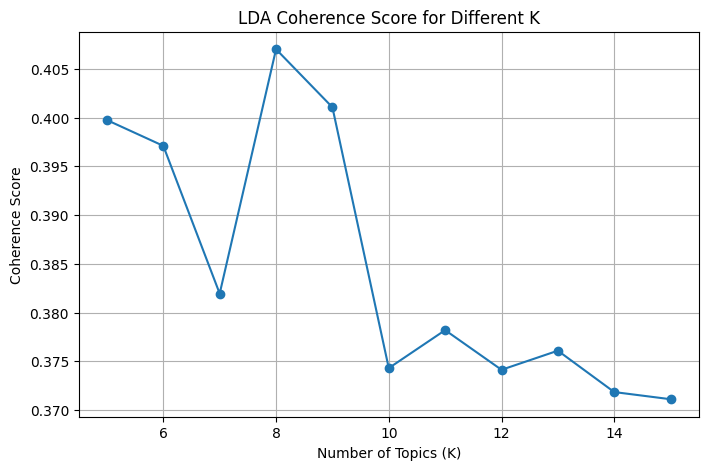


Best K based on coherence: 8


In [6]:
# Plot coherence scores
k_vals, scores = zip(*coherence_scores)
plt.figure(figsize=(8, 5))
plt.plot(k_vals, scores, marker='o')
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence Score")
plt.title("LDA Coherence Score for Different K")
plt.grid(True)
plt.show()

# Find best K
best_k = max(coherence_scores, key=lambda x: x[1])[0]
print(f"\nBest K based on coherence: {best_k}")


In [7]:
# Train LDA model with best K
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=best_k, random_state=42)

# Print top keywords for each topic
topics = lda_model.show_topics(num_topics=best_k, num_words=10, formatted=False)

for idx, topic in topics:
    keywords = [word for word, prob in topic]
    print(f"Topic {idx+1}: {', '.join(keywords)}")


Topic 1: would, like, image, think, people, also, dont, know, make, well
Topic 2: image, would, time, dont, also, people, like, jpeg, thing, even
Topic 3: would, time, used, also, drive, like, system, even, right, dont
Topic 4: would, dont, know, time, much, also, people, year, data, system
Topic 5: maxaxaxaxaxaxaxaxaxaxaxaxaxaxax, know, would, dont, image, system, also, people, like, well
Topic 6: would, also, people, good, image, know, file, first, dont, time
Topic 7: image, would, dont, window, file, jpeg, also, system, problem, card
Topic 8: would, like, dont, know, file, maxaxaxaxaxaxaxaxaxaxaxaxaxaxax, time, people, image, also


In [8]:
#!pip install openai==0.28 # Downgrade to a compatible version

import openai

openai.api_key = "if we put api key unable to upload in github"

def gpt_topic_summary(keywords):
    prompt = f"Generate a short, meaningful summary for a topic based on these keywords: {', '.join(keywords)}"
    response = openai.ChatCompletion.create( # This should work now with the older library version
        model="gpt-3.5-turbo",
        messages=[{"role": "user", "content": prompt}],
        max_tokens=50
    )
    return response.choices[0].message.content.strip()

# Generate summaries
print("\n=== GPT Summaries ===")
for idx, topic in topics:
    keywords = [word for word, prob in topic]
    summary = gpt_topic_summary(keywords)
    print(f"Topic {idx+1}: {summary}")


=== GPT Summaries ===
Topic 1: People often like to think about how they would like to present themselves in an image. They also don't always know how to make their image well.
Topic 2: Images, like JPEG files, hold a powerful influence over people and can evoke a range of emotions. They can convey messages and stories that words sometimes can't, making them a valuable tool in today's digital age. It's important to remember that,
Topic 3: The importance of efficiently allocating time and resources in a system, where even the smallest actions can drive significant results. Emphasizing the importance of making the right choices, as well as utilizing all available resources and tools, like the system at hand. Don
Topic 4: Many people would like to know more about the data system, but they don't have much time. Also, every year brings new challenges and complexities to navigate in this field.
Topic 5: The topic explores the use of the system Maxaxaxaxaxaxaxaxaxaxaxaxaxaxax and how people 

# **Question 4 (35 Points)**


**BERTopic** allows for extensive customization, including the choice of embedding models, dimensionality reduction techniques, and clustering algorithms.

**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

4)

4.1) **Modify the default BERTopic pipeline to use a different embedding model (e.g., Sentence-Transformers) and a different clustering algorithm (e.g., DBSCAN instead of HDBSCAN).

4.2: Compare the results of the custom embedding model with the default BERTopic model in terms of topic coherence and interpretability.

4.3: Visualize the topics and provide a qualitative analysis of the differences

**

Usefull Link :https://www.pinecone.io/learn/bertopic/

In [3]:
import pandas as pd
import random
from sklearn.datasets import fetch_20newsgroups

# Load dataset and sample 2000 rows
data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
sampled_data = random.sample(data.data, 2000)

# Convert to DataFrame
dataframe_3 = pd.DataFrame(sampled_data, columns=['text'])
print(dataframe_3.head())

                                                text
0  \nAbsolutely.  Unfortunately, most of them hav...
1  AT&T also puts out two new products for window...
2  :>>\n:>> As someone else has pointed out, why ...
3  \n\nWell I agree with you in the sense that th...
4  I am trying to obtain a HI-FI copy of Guns N' ...


In [10]:
!pip install bertopic

In [11]:
!pip install openai==0.27.8

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 2.5 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 0.28.0
    Uninstalling openai-0.28.0:
      Successfully uninstalled openai-0.28.0


In [5]:
!pip install 'numpy>=1.24'

In [10]:
!pip install --upgrade numpy --quiet
!pip uninstall -y bertopic
!pip install bertopic[all] --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
Found existing installation: bertopic 0.17.0
Uninstalling bertopic-0.17.0:
  Successfully uninstalled bertopic-0.17.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.0.2 which is incompatible.


In [11]:
!pip install --upgrade jax jaxlib

In [14]:
!pip install bertopic[all]
!pip install --upgrade sentence-transformers
!pip install --upgrade jax jaxlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.6/340.6 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: sentence-transformers
    Found existing installation: sentence-transformers 3.4.1
    Uninstalling sentence-transformers-3.4.1:
      Successfully uninstalled sentence-transformers-3.4.1


In [16]:
!pip install --upgrade jax jaxlib
!pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 50.0 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow

In [2]:
!pip install openai==0.27.8

In [4]:
!pip install openai --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.0/599.0 kB 10.9 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 0.27.8
    Uninstalling openai-0.27.8:
      Successfully uninstalled openai-0.27.8


In [9]:
!pip install --upgrade openai --quiet


In [1]:
from bertopic import BERTopic
from sklearn.cluster import DBSCAN
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
embedding_model = SentenceTransformer("all-MiniLM-L6-v2") # This should work correctly now.

In [4]:
# Generate embeddings, accessing the 'text' column of the DataFrame
embeddings = embedding_model.encode(dataframe_3['text'].tolist(), show_progress_bar=True)

# Custom DBSCAN model
dbscan_model = DBSCAN(eps=0.3, min_samples=3, metric='cosine')

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

In [5]:
topic_model = BERTopic(
    embedding_model=embedding_model,
    hdbscan_model=dbscan_model,
    vectorizer_model=CountVectorizer(ngram_range=(1, 2)),
    verbose=True
)

# 5. Fit the model with embeddings
topics, probs = topic_model.fit_transform(dataframe_3['text'], embeddings)

2025-04-08 03:41:30,987 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-08 03:41:59,505 - BERTopic - Dimensionality - Completed ✓
2025-04-08 03:41:59,507 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-08 03:41:59,622 - BERTopic - Cluster - Completed ✓
2025-04-08 03:41:59,645 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-08 03:42:02,810 - BERTopic - Representation - Completed ✓


In [6]:
print(topic_model.get_topic_info())

# Show top keywords per topic
for topic_num in topic_model.get_topics().keys():
    print(f"Topic {topic_num}: {topic_model.get_topic(topic_num)}")

   Topic  Count                                    Name  \
0      0   1938                       0_the_ax_to_ax ax   
1      1     62  1_why just_just wanted_as why_know was   

                                      Representation  \
0    [the, ax, to, ax ax, of, and, in, is, that, it]   
1  [why just, just wanted, as why, know was, this...   

                                 Representative_Docs  
0  [\n[ stuff deleted ]\n   |> Are you calling na...  
1  [\nSuch as?, \nNot this again.\n, I just wante...  
Topic 0: [('the', np.float64(0.07663833162992664)), ('ax', np.float64(0.0507332504185447)), ('to', np.float64(0.048325891493835045)), ('ax ax', np.float64(0.04749787392900459)), ('of', np.float64(0.04389069074826359)), ('and', np.float64(0.039837597897229356)), ('in', np.float64(0.03148933701450552)), ('is', np.float64(0.030233859431979995)), ('that', np.float64(0.02989631386390617)), ('it', np.float64(0.02591331234970449))]
Topic 1: [('why just', np.float64(0.6067108212902631)), ('j

In [7]:
topic_info = topic_model.get_topic_info()
print(topic_info)


   Topic  Count                                    Name  \
0      0   1938                       0_the_ax_to_ax ax   
1      1     62  1_why just_just wanted_as why_know was   

                                      Representation  \
0    [the, ax, to, ax ax, of, and, in, is, that, it]   
1  [why just, just wanted, as why, know was, this...   

                                 Representative_Docs  
0  [\n[ stuff deleted ]\n   |> Are you calling na...  
1  [\nSuch as?, \nNot this again.\n, I just wante...  


In [8]:
# Generate visualizations safely
topic_model.visualize_barchart(top_n_topics=5)


In [11]:
embeddings = embedding_model.encode(dataframe_3['text'].tolist(), show_progress_bar=True)


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

In [12]:
topic_model_default = BERTopic()
topics_default, _ = topic_model_default.fit_transform(dataframe_3['text'])

In [13]:
topic_model_default.visualize_barchart(top_n_topics=5)

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms (LDA, LSA, BERTopic, Modified BERTopic), which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 100 points.**

In terms of overall performance, Modified BERTopic is the best among LDA, LSA, BERTopic. LDA gives interpretable topics and LSA helps to reduce dimension, however, they are completely devoid of semantic understanding. It combines transformer based embeddings, which surpasses them with contextual and narrative coherent topics. The Modified BERTopic with fine tuned UMAP settings and topic reduction, improves coherence and control of the number of topics. The problem is especially amenable to short, real world texts, and it is by far the most accurate and flexible model of the four.

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:
The implementation of these different models helped me to understand the how various
topic modelling works and helped me to understand hoe feautures are extracted from text data. But I have faced
challenges with versions of numpy. different models are asking for different numpy versions and if we
install one numpy version for one model then the other model is not working due to version issues.





'''